In [1]:
#Data saved in csv/excel
import glob, os
import pandas as pd

data_dir="C:/Users/tsb7592/Box/Avera NIHTB Data"
os.chdir(data_dir)

In [2]:
import sys 

stdoutOrigin=sys.stdout 
sys.stdout = open("stat_output.txt", "w")

# Compute the Total response time in minutes

In [2]:
# get all files from all RC In-person subdirectories

all_files = glob.glob('C:\\Users\\tsb7592\\Box\\Avera NIHTB Data\\Rapid City\\*\\In Person\\*CB_Data.csv')

doc =[]
for file in all_files:
    data = pd.read_csv(file)
    display(file)
    doc.append(data)

# get all files from all SF
all_files = glob.glob('C:\\Users\\tsb7592\\Box\\Avera NIHTB Data\\Sioux Falls\\*\\In Person\\*CB_Data.csv')
for file in all_files:
    data = pd.read_csv(file)
    display(file)
    doc.append(data)

all_files = glob.glob('C:\\Users\\tsb7592\\Box\\Avera NIHTB Data\\Sioux Falls\\*\\In Person\\*PVT_Data.csv')
sep= []
for file in all_files:
    data = pd.read_csv(file)
    display(file)
    if data.shape[1]!= 11:
        doc.append(data)

    else:
        sep.append(data)
df = pd.concat(doc)

'C:\\Users\\tsb7592\\Box\\Avera NIHTB Data\\Rapid City\\EPRC_00032\\In Person\\210330_EPRC_00032_A_8Y_NT_CB_Data.csv'

'C:\\Users\\tsb7592\\Box\\Avera NIHTB Data\\Rapid City\\EPRC_00160\\In Person\\210423_EPRC_00160_A_8Y_NT_CB_Data.csv'

'C:\\Users\\tsb7592\\Box\\Avera NIHTB Data\\Rapid City\\EPRC_00162\\In Person\\210407_EPRC_00162_A_8Y_NT_CB_Data.csv'

'C:\\Users\\tsb7592\\Box\\Avera NIHTB Data\\Rapid City\\EPRC_00173\\In Person\\210331_EPRC_00173_A_8Y_NT_CB_Data.csv'

'C:\\Users\\tsb7592\\Box\\Avera NIHTB Data\\Rapid City\\EPRC_00179\\In Person\\210427_EPRC_00179_A_8Y_NT_CB_Data.csv'

'C:\\Users\\tsb7592\\Box\\Avera NIHTB Data\\Rapid City\\EPRC_00181\\In Person\\210420_EPRC_00181_A_8Y_NT_CB_Data.csv'

'C:\\Users\\tsb7592\\Box\\Avera NIHTB Data\\Rapid City\\EPRC_00183\\In Person\\210422_EPRC_00183_8Y_NT_CB_Data.csv'

'C:\\Users\\tsb7592\\Box\\Avera NIHTB Data\\Rapid City\\EPRC_00191\\In Person\\210506_EPRC_00191_A_8Y_NT_CB_Data.csv'

'C:\\Users\\tsb7592\\Box\\Avera NIHTB Data\\Rapid City\\EPRC_00380\\In Person\\210419_EPRC_00380_A_8Y_NT_CB_Data.csv'

'C:\\Users\\tsb7592\\Box\\Avera NIHTB Data\\Rapid City\\EPRC_00550\\In Person\\210412_EPRC_00550_A_8Y_NT_CB_Data.csv'

'C:\\Users\\tsb7592\\Box\\Avera NIHTB Data\\Sioux Falls\\EPSF_00832_A\\In Person\\210413_EPSF_00832_A_8Y_NT_CB_Data.csv'

'C:\\Users\\tsb7592\\Box\\Avera NIHTB Data\\Sioux Falls\\EPSF_00836_A\\In Person\\210413_EPSF_00836_A_8Y_NT_CB_Data.csv'

'C:\\Users\\tsb7592\\Box\\Avera NIHTB Data\\Sioux Falls\\EPSF_00847_A\\In Person\\210412_EPSF_00847_A_8Y_CB_Data.csv'

'C:\\Users\\tsb7592\\Box\\Avera NIHTB Data\\Sioux Falls\\EPSF_00944_A\\In Person\\210416_EPSF_00944_A_8Y_NT_CB_Data.csv'

'C:\\Users\\tsb7592\\Box\\Avera NIHTB Data\\Sioux Falls\\EPSF_00944_B\\In Person\\210416_EPSF_00944_B_8Y_NT_CB_Data.csv'

'C:\\Users\\tsb7592\\Box\\Avera NIHTB Data\\Sioux Falls\\EPSF_01247_A\\In Person\\210412_EPSF_01247_A_8Y_NT_CB_Data.csv'

'C:\\Users\\tsb7592\\Box\\Avera NIHTB Data\\Sioux Falls\\EPSF_01247_A\\In Person\\210414_EPSF_01247_A_8Y_NT_CB_Data.csv'

'C:\\Users\\tsb7592\\Box\\Avera NIHTB Data\\Sioux Falls\\EPSF_01666_A\\In Person\\210412_EPSF_01666_A_8Y_NT_CB_Data.csv'

'C:\\Users\\tsb7592\\Box\\Avera NIHTB Data\\Sioux Falls\\EPSF_00943_A\\In Person\\210409_EPSF_00943_A_9.5Y_M_NT_NS_PVT_Data.csv'

'C:\\Users\\tsb7592\\Box\\Avera NIHTB Data\\Sioux Falls\\EPSF_00943_A\\In Person\\210409_EPSF_00943_A_9.5Y_M_NT_PVT_Data.csv'

In [3]:
sdf = pd.concat(sep)

In [4]:
sdf.shape

(403, 11)

In [5]:
#Set two decimal points for display
pd.options.display.float_format = "{:.2f}".format

In [6]:
df.columns

Index(['PIN', 'DeviceID', 'Assessment Name', 'InstOrdr', 'InstSctn', 'ItmOrdr',
       'Inst', 'Locale', 'ItemID', 'Response', 'Score', 'Theta', 'TScore',
       'SE', 'DataType', 'Position', 'ResponseTime', 'DateCreated',
       'InstStarted', 'InstEnded', 'App Version', 'iPad Version',
       'Firmware Version'],
      dtype='object')

In [7]:
#Reshape the data for EPSF_00944 and EPSF_00943 from long to wide
sdf=sdf.pivot_table(index=['PIN', 'DeviceID', 'AssessmentName', 'ResponseID', 'ItemID',
       'InstrumentTitle', 'TestName', 'InstrumentID'], columns='Key', values='Value', aggfunc='first').reset_index()

In [8]:
sdf.columns=['PIN', 'DeviceID', 'Assessment Name', 'ResponseID', 'ItemID',
       'Inst', 'TestName', 'InstrumentID', 'App Version', 'DataType',
       'DateCreated', 'Firmware Version', 'InstEnded',
      'InstOrdr', 'InstSctn', 'InstStarted',
       'ItmOrdr', 'Locale', 'Position', 'Response', 'ResponseTime', 'SE',
       'Score', 'Theta', 'iPad Version']

In [9]:
sdf =sdf.drop(columns=['ResponseID','TestName','InstrumentID'])

In [10]:
sdf['Site'] = 'Sioux Falls'

In [11]:
#combine all the data for time calculation
df = df.append(sdf)

In [12]:
df.shape

(3292, 24)

In [13]:
df['PIN'].unique()

array(['210330_EPRC_00032_A_8Y', '210423_EPRC_00160_A_8Y',
       '210407_EPRC_00162_A_8Y', '210331_EPRC_00173_A_8Y',
       '210427_EPRC_00179_A_8Y', '210420_EPRC_00181_A_8Y',
       '210422_EPRC_00183_A_8Y', '210506_EPRC_00191_A_8Y',
       '210419_EPRC_00380_A_8Y', '210412_EPRC_00550_A_8Y',
       '210413_EPSF_00832_A_8Y', '210413_EPSF_00836_A_8Y',
       '210412_EPSF_00847_A_8Y', '210416_EPSF_00944_B_8Y',
       '210416_EPSF_00944_A', '210412_EPSF_01247_A_8Y',
       '210414_EPSF_01247_A_8Y', '210412_EPSF_01666_A_8Y',
       '210409_EPSF_00943_A_9.5Y_M'], dtype=object)

In [14]:
df['PIN'] = df['PIN'].str[7:19]

In [15]:
#Convert to datetime
df['InstStarted']= pd.to_datetime(df['InstStarted'])
df['InstEnded']= pd.to_datetime(df['InstEnded'])

In [16]:
#groupby PIN, Inst to calculate the time spent in each inst by each participant
mni =df.groupby(['PIN','Inst'])['InstStarted','InstEnded'].first().reset_index()

<ipython-input-16-343c5d240ab3>:2: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  mni =df.groupby(['PIN','Inst'])['InstStarted','InstEnded'].first().reset_index()


In [17]:
mni['Time']=mni['InstEnded']-mni['InstStarted']

In [18]:
mni=mni.drop(columns=['InstStarted'])

In [19]:
mni.InstEnded= mni.InstEnded.map(lambda x: x.strftime('%Y-%m-%d'))

In [20]:
mni.rename(columns={'InstEnded':'Date'}, inplace=True)

In [21]:
mni.head()

,PIN,Inst,Date,Time
0,EPRC_00032_A,NIH Toolbox Dimensional Change Card Sort Test ...,2021-03-30,0 days 00:05:18
1,EPRC_00032_A,NIH Toolbox Flanker Inhibitory Control and Att...,2021-03-30,0 days 00:03:58
2,EPRC_00032_A,NIH Toolbox List Sorting Working Memory Test A...,2021-03-30,0 days 00:10:36
3,EPRC_00032_A,NIH Toolbox Oral Reading Recognition Test Age ...,2021-03-30,0 days 00:01:26
4,EPRC_00032_A,NIH Toolbox Pattern Comparison Processing Spee...,2021-03-30,0 days 00:01:34


In [22]:
#drop 'NIH Toolbox List Sorting Working Memory Test Age 7+ v2.1' to calculate the time
mni_c=mni[mni['Inst']!='NIH Toolbox List Sorting Working Memory Test Age 7+ v2.1']

In [23]:
mni_c.shape

(138, 4)

In [24]:
#Using the corrected matched ones to calculate the total time spent by each participant
IP =mni_c.groupby(['PIN'])['Time'].sum().reset_index()

In [25]:
#Convert to minute
IP['Time']=round(IP['Time'].dt.total_seconds()/60,2)
mni['Time']=round(mni['Time'].dt.total_seconds()/60,2)

In [26]:
mni['Mode'] = 'In Person'

In [27]:
#this one has the time breakdown for each participant spent on each inst 
mni[mni['PIN']=='EPRC_00160_A'][['Inst', 'Time', 'Mode']]

,Inst,Time,Mode
9,NIH Toolbox Dimensional Change Card Sort Test ...,5.75,In Person
10,NIH Toolbox Flanker Inhibitory Control and Att...,3.67,In Person
11,NIH Toolbox List Sorting Working Memory Test A...,10.05,In Person
12,NIH Toolbox Oral Reading Recognition Test Age ...,2.07,In Person
13,NIH Toolbox Pattern Comparison Processing Spee...,2.00,In Person
14,NIH Toolbox Pattern Comparison Processing Spee...,1.65,In Person
15,NIH Toolbox Picture Sequence Memory Test Age 8...,7.32,In Person
16,NIH Toolbox Picture Vocabulary Test Age 3+ Pra...,1.73,In Person
17,NIH Toolbox Picture Vocabulary Test Age 3+ v2.1,1.45,In Person


In [28]:
#Average total time for in person
IP['Time'].mean()

23.75833333333334

In [29]:
# get all files from all RC Remote subdirectories

all_files = glob.glob('C:/Users/tsb7592/Box/Avera NIHTB Data/Rapid City/*/Remote/*CB_Data_R.csv')


doc =[]
for file in all_files:
    data = pd.read_csv(file)
    doc.append(data)
    display(file)

# get all files from all SF Remote subdirectories
all_files = glob.glob('C:/Users/tsb7592/Box/Avera NIHTB Data/Sioux Falls/*/Remote/*CB_Data_R.csv')

for file in all_files:
    data = pd.read_csv(file)
    doc.append(data) 
    display(file)

df = pd.concat(doc)

'C:/Users/tsb7592/Box/Avera NIHTB Data/Rapid City\\EPRC_00032\\Remote\\210406_EPRC_00032_A_8Y_NT_CB_Data_R.csv'

'C:/Users/tsb7592/Box/Avera NIHTB Data/Rapid City\\EPRC_00160\\Remote\\210416_EPRC_00160_A_8Y_NT_CB_Data_R.csv'

'C:/Users/tsb7592/Box/Avera NIHTB Data/Rapid City\\EPRC_00162\\Remote\\210414_EPRC_00162_A_8Y_NT_CB_Data_R.csv'

'C:/Users/tsb7592/Box/Avera NIHTB Data/Rapid City\\EPRC_00173\\Remote\\210408_EPRC_00173_A_8Y_NT_CB_Data_R.csv'

'C:/Users/tsb7592/Box/Avera NIHTB Data/Rapid City\\EPRC_00179\\Remote\\210420_EPRC_00179_A_8Y_NT_CB_Data_R.csv'

'C:/Users/tsb7592/Box/Avera NIHTB Data/Rapid City\\EPRC_00181\\Remote\\210415_EPRC_00181_A_8Y_NT_CB_Data_R.csv'

'C:/Users/tsb7592/Box/Avera NIHTB Data/Rapid City\\EPRC_00183\\Remote\\210415_EPRC_00183_A_8Y_NT_CB_Data_R.csv'

'C:/Users/tsb7592/Box/Avera NIHTB Data/Rapid City\\EPRC_00191\\Remote\\210426_EPRC_00191_A_8Y_NT_CB_Data_R.csv'

'C:/Users/tsb7592/Box/Avera NIHTB Data/Rapid City\\EPRC_00380\\Remote\\210412_EPRC_00380_A_8Y_NT_CB_Data_R.csv'

'C:/Users/tsb7592/Box/Avera NIHTB Data/Rapid City\\EPRC_00550\\Remote\\210419_EPRC_00550_A_8Y_NT_CB_Data_R.csv'

'C:/Users/tsb7592/Box/Avera NIHTB Data/Sioux Falls\\EPSF_00832_A\\Remote\\210408_EPSF_00832_A_8Y_NT_CB_Data_R.csv'

'C:/Users/tsb7592/Box/Avera NIHTB Data/Sioux Falls\\EPSF_00836_A\\Remote\\210415_EPSF_00836_A_8Y_NT_CB_Data_R.csv'

'C:/Users/tsb7592/Box/Avera NIHTB Data/Sioux Falls\\EPSF_00847_A\\Remote\\210409_EPSF_00847_A_8Y_NT_CB_Data_R.csv'

'C:/Users/tsb7592/Box/Avera NIHTB Data/Sioux Falls\\EPSF_00944_A\\Remote\\210409_EPSF_00944_A_8Y_NT_CB_Data_R.csv'

'C:/Users/tsb7592/Box/Avera NIHTB Data/Sioux Falls\\EPSF_00944_B\\Remote\\210409_EPSF_00944_B_8Y_NT_CB_Data_R.csv'

'C:/Users/tsb7592/Box/Avera NIHTB Data/Sioux Falls\\EPSF_01666_A\\Remote\\210408_EPSF_01666_A_8Y_NT_CB_Data_R.csv'

In [30]:
df.head()

,PIN,DeviceID,Assessment Name,InstOrdr,InstSctn,ItmOrdr,Inst,Locale,ItemID,Response,...,SE,DataType,Position,ResponseTime,DateCreated,InstStarted,InstEnded,App Version,iPad Version,Firmware Version
0,210406_EPRC_00032_A_8Y,4C0D4D8F-B79D-47C3-AF1A-4D100D11BF28,Assessment 1,1,1,1,NIH Toolbox Picture Vocabulary Test Age 3+ Pra...,en-US,VOCAB_INTRO,NaN,...,NaN,informational,NaN,NaN,2021-04-06 15:56:38,2021-04-06 15:56:35,2021-04-06 15:59:23,1.23.4532 (Participant),"iPad Pro 1st Gen (10.5-inch) / iPad7,3",14.4.1
1,210406_EPRC_00032_A_8Y,4C0D4D8F-B79D-47C3-AF1A-4D100D11BF28,Assessment 1,1,1,2,NIH Toolbox Picture Vocabulary Test Age 3+ Pra...,en-US,VOCAB_INSTR1,NaN,...,NaN,informational,NaN,NaN,2021-04-06 15:58:23,2021-04-06 15:56:35,2021-04-06 15:59:23,1.23.4532 (Participant),"iPad Pro 1st Gen (10.5-inch) / iPad7,3",14.4.1
2,210406_EPRC_00032_A_8Y,4C0D4D8F-B79D-47C3-AF1A-4D100D11BF28,Assessment 1,1,1,3,NIH Toolbox Picture Vocabulary Test Age 3+ Pra...,en-US,VOCAB_PRACT1,4,...,NaN,integer,1.00,6.99,2021-04-06 15:58:31,2021-04-06 15:56:35,2021-04-06 15:59:23,1.23.4532 (Participant),"iPad Pro 1st Gen (10.5-inch) / iPad7,3",14.4.1
3,210406_EPRC_00032_A_8Y,4C0D4D8F-B79D-47C3-AF1A-4D100D11BF28,Assessment 1,1,1,4,NIH Toolbox Picture Vocabulary Test Age 3+ Pra...,en-US,VOCAB_PRACT2,3,...,NaN,integer,2.00,7.22,2021-04-06 15:58:40,2021-04-06 15:56:35,2021-04-06 15:59:23,1.23.4532 (Participant),"iPad Pro 1st Gen (10.5-inch) / iPad7,3",14.4.1
4,210406_EPRC_00032_A_8Y,4C0D4D8F-B79D-47C3-AF1A-4D100D11BF28,Assessment 1,1,1,5,NIH Toolbox Picture Vocabulary Test Age 3+ Pra...,en-US,VOCAB_INSTR2,NaN,...,NaN,informational,NaN,NaN,2021-04-06 15:59:23,2021-04-06 15:56:35,2021-04-06 15:59:23,1.23.4532 (Participant),"iPad Pro 1st Gen (10.5-inch) / iPad7,3",14.4.1


In [31]:
df['PIN']=df['PIN'].replace(' ', '', regex=True)

In [32]:
df['PIN'] = df['PIN'].str[7:19]

In [33]:
df['PIN'].unique()

array(['EPRC_00032_A', 'EPRC_00160_A', 'EPRC_00162_A', 'EPRC_00173_A',
       'EPRC_00179_A', 'EPRC_00181_A', 'EPRC_00183_A', 'EPRC_00191_A',
       'EPRC_00380_A', 'EPRC_00550_A', 'EPSF_00832_A', 'EPSF_00836_A',
       'EPSF_00847_A', 'EPSF_00944_A', 'EPSF_00944_B', 'EPSF_01666_A'],
      dtype=object)

In [34]:
df['InstStarted']= pd.to_datetime(df['InstStarted'])

In [35]:
df['InstEnded']= pd.to_datetime(df['InstEnded'])

In [36]:
mnr =df.groupby(['PIN','Inst'])['InstStarted','InstEnded'].first().reset_index()

<ipython-input-36-36cef9752c8c>:1: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  mnr =df.groupby(['PIN','Inst'])['InstStarted','InstEnded'].first().reset_index()


In [37]:
mnr['Time']=mnr['InstEnded']-mnr['InstStarted']

In [38]:
mnr=mnr.drop(columns=['InstStarted'])

In [39]:
mnr.InstEnded= mnr.InstEnded.map(lambda x: x.strftime('%Y-%m-%d'))

In [40]:
RM =mnr.groupby(['PIN'])['Time'].sum().reset_index()

In [41]:
RM['Time']=round(RM['Time'].dt.total_seconds()/60,2)

In [42]:
mnr.rename(columns={'InstEnded':'Date'}, inplace=True)

In [43]:
mnr.PIN.unique()

array(['EPRC_00032_A', 'EPRC_00160_A', 'EPRC_00162_A', 'EPRC_00173_A',
       'EPRC_00179_A', 'EPRC_00181_A', 'EPRC_00183_A', 'EPRC_00191_A',
       'EPRC_00380_A', 'EPRC_00550_A', 'EPSF_00832_A', 'EPSF_00836_A',
       'EPSF_00847_A', 'EPSF_00944_A', 'EPSF_00944_B', 'EPSF_01666_A'],
      dtype=object)

In [44]:
RM

,PIN,Time
0,EPRC_00032_A,27.20
1,EPRC_00160_A,31.40
2,EPRC_00162_A,23.42
3,EPRC_00173_A,18.88
4,EPRC_00179_A,27.92
5,EPRC_00181_A,27.35
6,EPRC_00183_A,23.12
7,EPRC_00191_A,28.25
8,EPRC_00380_A,27.92
9,EPRC_00550_A,15.78


In [45]:
RM['Time'].mean()

26.700625

In [46]:
mnr['Time']=round(mnr['Time'].dt.total_seconds()/60,2)

In [47]:
mnr['Mode'] ='Remote'

In [48]:
import math

def degreesOfFreedom(X, Y):
    s1 = X.var()
    s2 = Y.var()
    df = (s1 / len(X) + s2 / len(Y))**2 / ((s1 / len(X))**2 / (len(X) - 1) + (s2 / len(Y))**2 / (len(Y) - 1))
    
    return(df)

In [49]:
#drop the outliers only have 2 inst for in person
IP=IP[IP['PIN']!='210409_EPSF_00943_A']

In [50]:
times = pd.merge(IP, RM, how= 'inner', on='PIN')

In [51]:
times.columns =['PIN','Total_time', 'Total_time_R']

In [52]:
times

,PIN,Total_time,Total_time_R
0,EPRC_00032_A,25.73,27.20
1,EPRC_00160_A,25.63,31.40
2,EPRC_00162_A,27.25,23.42
3,EPRC_00173_A,29.70,18.88
4,EPRC_00179_A,21.40,27.92
5,EPRC_00181_A,24.33,27.35
6,EPRC_00183_A,23.65,23.12
7,EPRC_00191_A,23.93,28.25
8,EPRC_00380_A,24.33,27.92
9,EPRC_00550_A,30.62,15.78


In [53]:
IP.PIN.unique()

array(['EPRC_00032_A', 'EPRC_00160_A', 'EPRC_00162_A', 'EPRC_00173_A',
       'EPRC_00179_A', 'EPRC_00181_A', 'EPRC_00183_A', 'EPRC_00191_A',
       'EPRC_00380_A', 'EPRC_00550_A', 'EPSF_00832_A', 'EPSF_00836_A',
       'EPSF_00847_A', 'EPSF_00943_A', 'EPSF_00944_A', 'EPSF_00944_B',
       'EPSF_01247_A', 'EPSF_01666_A'], dtype=object)

In [54]:
RM.PIN.unique()

array(['EPRC_00032_A', 'EPRC_00160_A', 'EPRC_00162_A', 'EPRC_00173_A',
       'EPRC_00179_A', 'EPRC_00181_A', 'EPRC_00183_A', 'EPRC_00191_A',
       'EPRC_00380_A', 'EPRC_00550_A', 'EPSF_00832_A', 'EPSF_00836_A',
       'EPSF_00847_A', 'EPSF_00944_A', 'EPSF_00944_B', 'EPSF_01666_A'],
      dtype=object)

# 1. A matched t-test for those who have both in-person and remote - Total Time
There are only 8 students both have in person and remote

In [55]:
print('mean',times.mean())
print('std',times.std())

mean Total_time     25.08
Total_time_R   26.70
dtype: float64
std Total_time     2.49
Total_time_R   4.82
dtype: float64


In [56]:
import numpy as np
import scipy.stats as stats
print('***A matched t-test for those who have both in-person and remote - Total Time***')
print('t-statistic = %6.2f pvalue = %6.2f' % stats.ttest_ind(times.Total_time, times.Total_time_R, equal_var = False))

***A matched t-test for those who have both in-person and remote - Total Time***
t-statistic =  -1.19 pvalue =   0.25


In [57]:
import numpy as np, statsmodels.stats.api as sms

X1, X2 = times['Total_time'], times['Total_time_R']
print('Degree of Freedom %6f' % (len(X1)-1))
cm = sms.CompareMeans(sms.DescrStatsW(X1), sms.DescrStatsW(X2))
print('95 CI=[%6.2f,%6.2f]' %cm.tconfint_diff(usevar='unequal'))

Degree of Freedom 15.000000
95 CI=[ -4.43,  1.19]


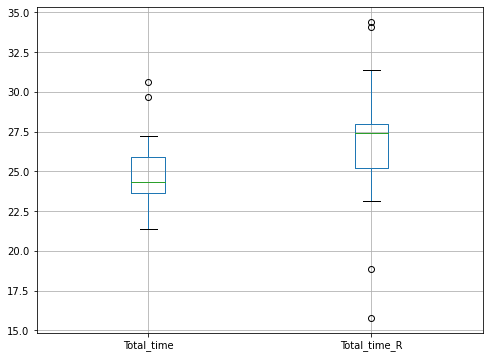

In [58]:
import matplotlib.pyplot as plt

# Box plot of ACS In person vs. Remote
plt.figure(figsize=(8, 6))
times.boxplot(column=['Total_time', 'Total_time_R'])

plt.show()

# 2.	Correlations between remote and in-person- Total Time
There are only 8 students both have in person and remote

In [59]:
import numpy as np
import scipy.stats as stats
print('')
print('Correlation = %6.2f pvalue = %6.2f' % stats.pearsonr(times['Total_time'], times['Total_time_R']))    # Pearson's correlation coefficient and p-value 


Correlation =  -0.66 pvalue =   0.01


In [60]:
time_breakdown = pd.concat([mni,mnr]) 

In [61]:
#time_breakdown.to_csv('C:/Users/tsb7592/Box/Avera NIHTB Data/Subset/time_breakdown.csv', index=False)

In [62]:
time_breakdown.groupby(['PIN','Mode'])['Inst'].count()

PIN           Mode     
EPRC_00032_A  In Person    9
              Remote       8
EPRC_00160_A  In Person    9
              Remote       8
EPRC_00162_A  In Person    9
              Remote       8
EPRC_00173_A  In Person    9
              Remote       7
EPRC_00179_A  In Person    9
              Remote       8
EPRC_00181_A  In Person    9
              Remote       8
EPRC_00183_A  In Person    9
              Remote       6
EPRC_00191_A  In Person    9
              Remote       8
EPRC_00380_A  In Person    9
              Remote       8
EPRC_00550_A  In Person    9
              Remote       5
EPSF_00832_A  In Person    9
              Remote       8
EPSF_00836_A  In Person    9
              Remote       8
EPSF_00847_A  In Person    9
              Remote       8
EPSF_00943_A  In Person    2
EPSF_00944_A  In Person    9
              Remote       8
EPSF_00944_B  In Person    9
              Remote       8
EPSF_01247_A  In Person    9
EPSF_01666_A  In Person    9
              Remot

# 3.	Does it take longer for remote vs. in-person? - Total Time


In [63]:
print('')
print('Does it take longer for remote vs. in-person? - Total Time')
print('t-statistic = %6.3f pvalue = %6.3f' % stats.wilcoxon(times.Total_time, times.Total_time_R, alternative='two-sided'))
print('')


Does it take longer for remote vs. in-person? - Total Time
t-statistic = 41.000 pvalue =  0.175



In [64]:
# Create a Pandas Excel writer using XlsxWriter as the engine
writer = pd.ExcelWriter('C:/Users/tsb7592/Box/Avera NIHTB Data/Subset/times.xlsx', engine='xlsxwriter')

# Write each dataframe to a different worksheet.
times.to_excel(writer, sheet_name='matched_time', index=False)
IP.to_excel(writer, sheet_name='in_person', index=False)
RM.to_excel(writer, sheet_name='remote', index=False)

# Close the Pandas Excel writer and output the Excel file.
writer.save()

# 4.	A student’s t-test for everyone 


In [65]:
#in person mean time
round(IP.Time.mean(),2)

23.76

In [66]:
#remote mean time
round(RM.Time.mean(),2)

26.7

In [67]:
RM

,PIN,Time
0,EPRC_00032_A,27.20
1,EPRC_00160_A,31.40
2,EPRC_00162_A,23.42
3,EPRC_00173_A,18.88
4,EPRC_00179_A,27.92
5,EPRC_00181_A,27.35
6,EPRC_00183_A,23.12
7,EPRC_00191_A,28.25
8,EPRC_00380_A,27.92
9,EPRC_00550_A,15.78


In [68]:
X1, X2 = IP.Time, RM.Time
print('A student’s t-test for everyone - unmatched')
print('t-statistic = %6.2f pvalue = %6.2f' % stats.ttest_ind(X1, X2, equal_var=False))

A student’s t-test for everyone - unmatched
t-statistic =  -1.60 pvalue =   0.12


In [69]:
RM.Time.mean()-IP.Time.mean()

2.9422916666666588

In [70]:
Md = RM.Time.mean()-IP.Time.mean()
print('mean difference(remote - in person):' , round(Md,2))
print('Degree of Freedom %6.2f' % degreesOfFreedom(X1,X2))

cm = sms.CompareMeans(sms.DescrStatsW(X1), sms.DescrStatsW(X2))
print('95 CI=[%6.2f,%6.2f]' %cm.tconfint_diff(usevar='unequal'))
print('')

mean difference(remote - in person): 2.94
Degree of Freedom  31.79
95 CI=[ -6.70,  0.81]



# 5.	Plot on x-axis remote scores for all the Inst, and plot on y-axis all the in-person 

In [71]:
import seaborn as sns
sns.set_theme(style="darkgrid")
#g = sns.jointplot(x="Total_time", y="Total_time_R", data=times,kind="reg", truncate=False,  color="m", height=7)

In [72]:
mni.Inst

0      NIH Toolbox Dimensional Change Card Sort Test ...
1      NIH Toolbox Flanker Inhibitory Control and Att...
2      NIH Toolbox List Sorting Working Memory Test A...
3      NIH Toolbox Oral Reading Recognition Test Age ...
4      NIH Toolbox Pattern Comparison Processing Spee...
                             ...                        
150    NIH Toolbox Pattern Comparison Processing Spee...
151    NIH Toolbox Pattern Comparison Processing Spee...
152    NIH Toolbox Picture Sequence Memory Test Age 8...
153    NIH Toolbox Picture Vocabulary Test Age 3+ Pra...
154      NIH Toolbox Picture Vocabulary Test Age 3+ v2.1
Name: Inst, Length: 155, dtype: object

In [73]:
time_anova=mni.append(mnr)

In [74]:
time_anova["Inst"].replace({'NIH Toolbox Picture Vocabulary Test Age 3+ Practice v2.1':'Pic_Vocabulary',
                            'NIH Toolbox Picture Vocabulary Test Age 3+ v2.1':'Pic_Vocabulary',
       'NIH Toolbox Flanker Inhibitory Control and Attention Test Ages 8-11 v2.1':'Flanker',
       'NIH Toolbox List Sorting Working Memory Test Age 7+ v2.1':'List_Sorting',
       'NIH Toolbox Dimensional Change Card Sort Test Ages 8-11 v2.1':'DCCS',
       'NIH Toolbox Pattern Comparison Processing Speed Test Age 7+ Practice v2.1':'Pattern_Comp',
       'NIH Toolbox Pattern Comparison Processing Speed Test Age 7+ v2.1':'Pattern_Comp',
       'NIH Toolbox Picture Sequence Memory Test Age 8+ Form A v2.1':'Pic_Seq',
       'NIH Toolbox Oral Reading Recognition Test Age 3+ v2.1':'Oral_Reading',
       'NIH Toolbox Picture Sequence Memory Test Age 8+ Form B v2.1':'Pic_Seq',
       'NIH Toolbox Oral Reading Recognition Test Age 3+ Instructions v2.1':'Oral_Reading_Inst'}, inplace=True)

In [75]:
time_anova.Inst.value_counts()

Pic_Vocabulary    68
Pattern_Comp      62
Flanker           33
DCCS              33
Oral_Reading      32
Pic_Seq           31
List_Sorting      17
Name: Inst, dtype: int64

In [76]:
mt=time_anova.pivot_table(index=['PIN', 'Mode'], columns='Inst', values='Time', aggfunc='first').reset_index()
mt=mt.drop(columns=['List_Sorting'])
mt =mt.dropna()

In [77]:
mt

Inst,PIN,Mode,DCCS,Flanker,Oral_Reading,Pattern_Comp,Pic_Seq,Pic_Vocabulary
0,EPRC_00032_A,In Person,5.30,3.97,1.43,1.57,8.92,1.50
1,EPRC_00032_A,Remote,5.60,3.95,1.75,2.03,8.08,2.80
2,EPRC_00160_A,In Person,5.75,3.67,2.07,2.00,7.32,1.73
3,EPRC_00160_A,Remote,7.67,5.58,2.28,2.00,9.78,0.55
4,EPRC_00162_A,In Person,5.15,3.63,2.00,1.47,9.22,1.55
5,EPRC_00162_A,Remote,4.72,3.25,1.57,1.73,7.90,0.35
6,EPRC_00173_A,In Person,6.00,4.17,2.97,2.85,8.05,1.98
8,EPRC_00179_A,In Person,5.10,3.33,1.27,1.48,6.00,0.92
9,EPRC_00179_A,Remote,5.50,4.10,1.75,1.72,9.37,2.00
10,EPRC_00181_A,In Person,5.33,3.63,1.43,1.63,8.38,1.05


In [78]:
# multiple ANOVA

from statsmodels.multivariate.manova import MANOVA

maovt = MANOVA.from_formula('DCCS+ Flanker + Oral_Reading + Pattern_Comp + Pic_Seq + Pic_Vocabulary ~ Mode', data=mt)
print('***multiple ANOVA ---Time***')
print(maovt.mv_test())

***multiple ANOVA ---Time***
                  Multivariate linear model
                                                              
--------------------------------------------------------------
       Intercept         Value  Num DF  Den DF F Value  Pr > F
--------------------------------------------------------------
          Wilks' lambda  0.0108 6.0000 22.0000 335.7538 0.0000
         Pillai's trace  0.9892 6.0000 22.0000 335.7538 0.0000
 Hotelling-Lawley trace 91.5692 6.0000 22.0000 335.7538 0.0000
    Roy's greatest root 91.5692 6.0000 22.0000 335.7538 0.0000
--------------------------------------------------------------
                                                              
--------------------------------------------------------------
            Mode          Value  Num DF  Den DF F Value Pr > F
--------------------------------------------------------------
            Wilks' lambda 0.4347 6.0000 22.0000  4.7675 0.0030
           Pillai's trace 0.5653 6.0000 22.00

# Get demographic data

In [79]:
# get all files from all RC In-person subdirectories

all_files = glob.glob('C:/Users/tsb7592/Box/Avera NIHTB Data/Rapid City/*/In Person/*CB_Reg.csv')

doc =[]
for file in all_files:
    data = pd.read_csv(file)
    doc.append(data)
    
all_files = glob.glob('C:/Users/tsb7592/Box/Avera NIHTB Data/Rapid City/*/Remote/*Reg_R.csv')

for file in all_files:
    data = pd.read_csv(file)
    doc.append(data)

# get all files from all SF
all_files = glob.glob('C:/Users/tsb7592/Box/Avera NIHTB Data/Sioux Falls/*/In Person/*CB_Reg.csv')
for file in all_files:
    data = pd.read_csv(file)
    doc.append(data)

# get all files from all SF
all_files = glob.glob('C:/Users/tsb7592/Box/Avera NIHTB Data/Sioux Falls/*/In Person/*Reg_R.csv')
for file in all_files:
    data = pd.read_csv(file)
    doc.append(data)

ddf = pd.concat(doc)

In [80]:
dcol =['PIN','Gender','Age','Race','Ethnicity']

In [81]:
ddf['PIN'] = ddf['PIN'].str[7:19]

In [82]:
ddf=ddf[dcol]

In [83]:
ddf=ddf.drop_duplicates()

In [84]:
ddf=ddf.dropna()

In [85]:
#Drop this duplicate 
#ddf= ddf[ddf['PIN']!='EPSF_01247_A']

In [86]:
ddf.reset_index()

,index,PIN,Gender,Age,Race,Ethnicity
0,0,EPRC_00032_A,2,8,1,1
1,0,EPRC_00160_A,2,8,1,1
2,0,EPRC_00162_A,1,8,1,1
3,0,EPRC_00173_A,1,8,8,1
4,0,EPRC_00179_A,1,8,1,2
5,0,EPRC_00181_A,2,8,1,1
6,0,EPRC_00183_A,2,8,1,1
7,0,EPRC_00191_A,1,8,1,1
8,0,EPRC_00380_A,2,8,1,1
9,0,EPRC_00550_A,1,8,1,1


In [87]:
ddf.to_csv('C:/Users/tsb7592/Box/Avera NIHTB Data/Subset/demographic_data.csv', index=False)

In [88]:
ddf.Gender.value_counts(normalize=True).mul(100).round(2).astype(str) + '%'

2    56.25%
1    43.75%
Name: Gender, dtype: object

# Scores

In [89]:
#  get all files from RC In-person subdirectories

all_files = glob.glob('C:/Users/tsb7592/Box/Avera NIHTB Data//Rapid City/*/In Person/*CB_Scores.csv')

doc =[]
for file in all_files:
    data = pd.read_csv(file)
    doc.append(data)

# get all files from all SF In_person subdirectories
all_files = glob.glob('C:/Users/tsb7592/Box/Avera NIHTB Data/Sioux Falls/*/In Person/*CB_Scores.csv')

for file in all_files:
    data = pd.read_csv(file)
    print(file)
    doc.append(data)

df = pd.concat(doc)

C:/Users/tsb7592/Box/Avera NIHTB Data/Sioux Falls\EPSF_00832_A\In Person\210413_EPSF_00832_A_8Y_NT_CB_Scores.csv
C:/Users/tsb7592/Box/Avera NIHTB Data/Sioux Falls\EPSF_00836_A\In Person\210413_EPSF_00836_A_8Y_NT_CB_Scores.csv
C:/Users/tsb7592/Box/Avera NIHTB Data/Sioux Falls\EPSF_00847_A\In Person\210412_EPSF_00847_A_8Y_CB_Scores.csv
C:/Users/tsb7592/Box/Avera NIHTB Data/Sioux Falls\EPSF_00944_A\In Person\210416_EPSF_00944_A_8Y_NT_CB_Scores.csv
C:/Users/tsb7592/Box/Avera NIHTB Data/Sioux Falls\EPSF_00944_B\In Person\210416_EPSF_00944_B_8Y_NT_CB_Scores.csv
C:/Users/tsb7592/Box/Avera NIHTB Data/Sioux Falls\EPSF_01247_A\In Person\210412_EPSF_01247_A_8Y_NT_CB_Scores.csv
C:/Users/tsb7592/Box/Avera NIHTB Data/Sioux Falls\EPSF_01247_A\In Person\210414_EPSF_01247_A_8Y_NT_CB_Scores.csv
C:/Users/tsb7592/Box/Avera NIHTB Data/Sioux Falls\EPSF_01666_A\In Person\210412_EPSF_01666_A_8Y_NT_CB_Scores.csv


In [90]:
df.shape

(199, 28)

In [91]:
df['PIN'] = df['PIN'].str[7:19]

In [92]:
keep =['PIN', 'Inst', 'RawScore', 'Theta', 'SE',
       'ItmCnt', 'Computed Score',
       'Uncorrected Standard Score', 'Age-Corrected Standard Score',
       'National Percentile (age adjusted)', 'Fully-Corrected T-score',
       'InstrumentBreakoff', 'InstrumentStatus2']

In [93]:
df=df[keep]

In [94]:
times

,PIN,Total_time,Total_time_R
0,EPRC_00032_A,25.73,27.20
1,EPRC_00160_A,25.63,31.40
2,EPRC_00162_A,27.25,23.42
3,EPRC_00173_A,29.70,18.88
4,EPRC_00179_A,21.40,27.92
5,EPRC_00181_A,24.33,27.35
6,EPRC_00183_A,23.65,23.12
7,EPRC_00191_A,23.93,28.25
8,EPRC_00380_A,24.33,27.92
9,EPRC_00550_A,30.62,15.78


In [95]:
#Differentiate the rows contain Composites
comp =df[df['Inst'].str.contains("Composite")]
raw =df[~df['Inst'].str.contains("Composite")]

In [96]:
raw=raw.dropna(axis=1, how='all')
raw.head()

,PIN,Inst,RawScore,Theta,SE,ItmCnt,Computed Score,Uncorrected Standard Score,Age-Corrected Standard Score,National Percentile (age adjusted),Fully-Corrected T-score,InstrumentBreakoff,InstrumentStatus2
0,EPRC_00032_A,NIH Toolbox Picture Vocabulary Test Age 3+ v2.1,NaN,-2.41,0.47,20.00,NaN,71.00,95.00,36.00,36.00,2.00,3.00
1,EPRC_00032_A,NIH Toolbox Flanker Inhibitory Control and Att...,20.00,NaN,NaN,24.00,7.24,89.00,94.00,34.00,45.00,2.00,3.00
2,EPRC_00032_A,NIH Toolbox List Sorting Working Memory Test A...,16.00,NaN,NaN,15.00,NaN,97.00,108.00,69.00,48.00,2.00,3.00
3,EPRC_00032_A,NIH Toolbox Dimensional Change Card Sort Test ...,26.00,NaN,NaN,38.00,6.73,91.00,96.00,40.00,46.00,2.00,3.00
4,EPRC_00032_A,NIH Toolbox Pattern Comparison Processing Spee...,34.00,NaN,NaN,34.00,39.00,80.00,86.00,18.00,39.00,2.00,3.00


In [97]:
comp=comp.dropna(axis=1, how='all')
comp.head()

,PIN,Inst,Uncorrected Standard Score,Age-Corrected Standard Score,National Percentile (age adjusted),Fully-Corrected T-score
7,EPRC_00032_A,Cognition Fluid Composite v1.1,93.00,103.00,59.00,48.00
8,EPRC_00032_A,Cognition Crystallized Composite v1.1,71.00,85.00,16.00,32.00
9,EPRC_00032_A,Cognition Total Composite Score v1.1,78.00,93.00,32.00,38.00
10,EPRC_00032_A,Cognition Early Childhood Composite v1.1,89.00,105.00,62.00,48.00
7,EPRC_00160_A,Cognition Fluid Composite v1.1,94.00,109.00,73.00,49.00


In [98]:
comp.Inst.unique()

array(['Cognition Fluid Composite v1.1',
       'Cognition Crystallized Composite v1.1',
       'Cognition Total Composite Score v1.1',
       'Cognition Early Childhood Composite v1.1'], dtype=object)

In [99]:
df[df['PIN']=='EPRC_00380_A']

,PIN,Inst,RawScore,Theta,SE,ItmCnt,Computed Score,Uncorrected Standard Score,Age-Corrected Standard Score,National Percentile (age adjusted),Fully-Corrected T-score,InstrumentBreakoff,InstrumentStatus2
0,EPRC_00380_A,NIH Toolbox Picture Vocabulary Test Age 3+ v2.1,NaN,-1.21,0.48,25.00,NaN,76.00,106.00,66.00,44.00,2.00,3.00
1,EPRC_00380_A,NIH Toolbox Flanker Inhibitory Control and Att...,19.00,NaN,NaN,24.00,7.24,89.00,94.00,34.00,45.00,2.00,3.00
2,EPRC_00380_A,NIH Toolbox List Sorting Working Memory Test A...,14.00,NaN,NaN,14.00,NaN,90.00,93.00,33.00,43.00,2.00,3.00
3,EPRC_00380_A,NIH Toolbox Dimensional Change Card Sort Test ...,29.00,NaN,NaN,38.00,5.92,84.00,87.00,18.00,39.00,2.00,3.00
4,EPRC_00380_A,NIH Toolbox Pattern Comparison Processing Spee...,27.00,NaN,NaN,30.00,28.00,65.00,68.00,2.00,21.00,2.00,3.00
5,EPRC_00380_A,NIH Toolbox Picture Sequence Memory Test Age 8...,5.00,-1.69,0.41,6.00,392.43,84.00,85.00,15.00,38.00,2.00,3.00
6,EPRC_00380_A,NIH Toolbox Oral Reading Recognition Test Age ...,NaN,-5.58,0.50,21.00,NaN,76.00,80.00,10.00,34.00,2.00,3.00
7,EPRC_00380_A,Cognition Fluid Composite v1.1,NaN,NaN,NaN,NaN,NaN,74.00,76.00,5.00,29.00,NaN,NaN
8,EPRC_00380_A,Cognition Crystallized Composite v1.1,NaN,NaN,NaN,NaN,NaN,74.00,92.00,30.00,38.00,NaN,NaN
9,EPRC_00380_A,Cognition Total Composite Score v1.1,NaN,NaN,NaN,NaN,NaN,69.00,80.00,10.00,29.00,NaN,NaN


In [100]:
df['Mode'] ='In Person'

In [101]:
#  get all files from RC Remote subdirectories

all_files = glob.glob('C:/Users/tsb7592/Box/Avera NIHTB Data/Rapid City/*/Remote/*CB_Scores_R.csv')

doc =[]
for file in all_files:
    data = pd.read_csv(file)
    doc.append(data)
    display(data.shape)


# get all files from all SF In_person subdirectories
all_files = glob.glob('C:/Users/tsb7592/Box/Avera NIHTB Data/Sioux Falls/*/Remote/*CB_Scores_R.csv')

for file in all_files:
    data = pd.read_csv(file)
    doc.append(data)

dfr = pd.concat(doc)

(8, 28)

(8, 28)

(8, 28)

(7, 28)

(7, 28)

(8, 28)

(8, 28)

(8, 28)

(8, 28)

(6, 28)

In [102]:
dfr.shape

(124, 28)

In [103]:
dfr['PIN'].unique()

array(['210406_EPRC_00032_A_8Y', '210415_EPRC_00160_A_8Y',
       '210414_EPRC_00162_A_8Y', '210408_EPRC_00173_A_8Y',
       '210420_EPRC_00179_A_8Y', '210415_EPRC_00181_A_8Y',
       '210415_EPRC_00183_A_8Y', '210426_EPRC_00191_A_8Y',
       '120421_EPRC_00380_A_8Y', '210419_EPRC_00550_A_8Y',
       '210408_EPSF_00832_A_8Y', '210415_EPSF_00836_A_8Y',
       '210409_EPSF_00847_A_8Y', '210409_EPSF_00944_A_8Y',
       '210409_EPSF_00944_B_8Y', '210408_EPSF _01666_A_NT_CB'],
      dtype=object)

In [104]:
dfr['PIN']=dfr['PIN'].replace(' ', '', regex=True)

In [105]:
dfr['PIN'] = dfr['PIN'].str[7:19]

In [106]:
dfr=dfr[keep]

In [107]:
dfr.head()

,PIN,Inst,RawScore,Theta,SE,ItmCnt,Computed Score,Uncorrected Standard Score,Age-Corrected Standard Score,National Percentile (age adjusted),Fully-Corrected T-score,InstrumentBreakoff,InstrumentStatus2
0,EPRC_00032_A,NIH Toolbox Picture Vocabulary Test Age 3+ v2.1,NaN,-1.73,0.48,24.00,NaN,74.00,95.00,36.00,44.00,2.00,3.00
1,EPRC_00032_A,NIH Toolbox Oral Reading Recognition Test Age ...,NaN,-5.00,0.50,22.00,NaN,78.00,80.00,10.00,34.00,2.00,3.00
2,EPRC_00032_A,NIH Toolbox Pattern Comparison Processing Spee...,34.00,NaN,NaN,37.00,39.00,80.00,86.00,18.00,39.00,2.00,3.00
3,EPRC_00032_A,NIH Toolbox Picture Sequence Memory Test Age 8...,19.00,0.24,0.31,6.00,585.56,115.00,121.00,92.00,62.00,2.00,3.00
4,EPRC_00032_A,NIH Toolbox Flanker Inhibitory Control and Att...,20.00,NaN,NaN,24.00,6.79,85.00,83.00,13.00,38.00,2.00,3.00


In [108]:
#Differentiate the rows contain Composites
comp_r =dfr[dfr['Inst'].str.contains("Composite")]
raw_r =dfr[~dfr['Inst'].str.contains("Composite")]

In [109]:
comp_r=comp_r.dropna(axis=1, how='all')
comp_r.head()

,PIN,Inst,Uncorrected Standard Score,Age-Corrected Standard Score,National Percentile (age adjusted),Fully-Corrected T-score
6,EPRC_00032_A,Cognition Crystallized Composite v1.1,74.00,85.00,16.00,38.00
7,EPRC_00032_A,Cognition Early Childhood Composite v1.1,85.00,98.00,44.00,43.00
6,EPRC_00160_A,Cognition Crystallized Composite v1.1,83.00,106.00,66.00,51.00
7,EPRC_00160_A,Cognition Early Childhood Composite v1.1,79.00,92.00,29.00,42.00
6,EPRC_00162_A,Cognition Crystallized Composite v1.1,81.00,99.00,48.00,46.00


In [110]:
comp['Mode'] = 'In Person'
comp_r['Mode'] = 'Remote'
boxp = pd.concat([comp,comp_r]) 

In [111]:
raw_r=raw_r.dropna(axis=1, how='all')
raw_r.head()

,PIN,Inst,RawScore,Theta,SE,ItmCnt,Computed Score,Uncorrected Standard Score,Age-Corrected Standard Score,National Percentile (age adjusted),Fully-Corrected T-score,InstrumentBreakoff,InstrumentStatus2
0,EPRC_00032_A,NIH Toolbox Picture Vocabulary Test Age 3+ v2.1,NaN,-1.73,0.48,24.00,NaN,74.00,95.00,36.00,44.00,2.00,3.00
1,EPRC_00032_A,NIH Toolbox Oral Reading Recognition Test Age ...,NaN,-5.00,0.50,22.00,NaN,78.00,80.00,10.00,34.00,2.00,3.00
2,EPRC_00032_A,NIH Toolbox Pattern Comparison Processing Spee...,34.00,NaN,NaN,37.00,39.00,80.00,86.00,18.00,39.00,2.00,3.00
3,EPRC_00032_A,NIH Toolbox Picture Sequence Memory Test Age 8...,19.00,0.24,0.31,6.00,585.56,115.00,121.00,92.00,62.00,2.00,3.00
4,EPRC_00032_A,NIH Toolbox Flanker Inhibitory Control and Att...,20.00,NaN,NaN,24.00,6.79,85.00,83.00,13.00,38.00,2.00,3.00


In [112]:
comp_r=comp_r.drop(columns='Mode')

In [113]:
comp=comp.drop(columns='Mode')

In [114]:
comp_r.columns =['PIN', 'Inst', 'Uncorrected Standard Score_r',
       'Age-Corrected Standard Score_r', 'National Percentile (age adjusted)_r',
       'Fully-Corrected T-score_r']

In [115]:
scores = pd.merge(comp, comp_r, on=["PIN",'Inst'])

In [116]:
dfr['Mode'] = 'Remote'

# NIH toolbox 

In [117]:
raw['Mode'] = 'In Person'
raw_r['Mode'] = 'Remote'
boxr = pd.concat([raw,raw_r]) 

In [118]:
keep1=['PIN', 'Inst', 'Age-Corrected Standard Score',
       'Fully-Corrected T-score']

In [119]:
boxr=boxr[['PIN', 'Inst', 'Age-Corrected Standard Score',
       'Fully-Corrected T-score','Mode']]
boxr

,PIN,Inst,Age-Corrected Standard Score,Fully-Corrected T-score,Mode
0,EPRC_00032_A,NIH Toolbox Picture Vocabulary Test Age 3+ v2.1,95.00,36.00,In Person
1,EPRC_00032_A,NIH Toolbox Flanker Inhibitory Control and Att...,94.00,45.00,In Person
2,EPRC_00032_A,NIH Toolbox List Sorting Working Memory Test A...,108.00,48.00,In Person
3,EPRC_00032_A,NIH Toolbox Dimensional Change Card Sort Test ...,96.00,46.00,In Person
4,EPRC_00032_A,NIH Toolbox Pattern Comparison Processing Spee...,86.00,39.00,In Person
...,...,...,...,...,...
2,EPSF_01666_A,NIH Toolbox Oral Reading Recognition Test Age ...,NaN,NaN,Remote
3,EPSF_01666_A,NIH Toolbox Oral Reading Recognition Test Age ...,NaN,NaN,Remote
4,EPSF_01666_A,NIH Toolbox Pattern Comparison Processing Spee...,104.00,54.00,Remote
5,EPSF_01666_A,NIH Toolbox Flanker Inhibitory Control and Att...,104.00,46.00,Remote


In [120]:
raw.columns

Index(['PIN', 'Inst', 'RawScore', 'Theta', 'SE', 'ItmCnt', 'Computed Score',
       'Uncorrected Standard Score', 'Age-Corrected Standard Score',
       'National Percentile (age adjusted)', 'Fully-Corrected T-score',
       'InstrumentBreakoff', 'InstrumentStatus2', 'Mode'],
      dtype='object')

In [121]:
raw=raw[keep1]
raw_r = raw_r[keep1]

In [122]:
raw_r.columns =['PIN', 'Inst', 'Age-Corrected Standard Score_r',
       'Fully-Corrected T-score_r']

In [123]:
NIH = pd.merge(raw, raw_r, on=["PIN",'Inst'])

In [124]:
boxr.shape

(223, 5)

In [125]:
# calculate the Cohen's d between two samples
from numpy.random import randn
from numpy.random import seed
from numpy import mean
from numpy import var
from math import sqrt
 
# function to calculate Cohen's d for independent samples
def cohend(d1, d2):
    # calculate the size of samples
    n1, n2 = len(d1), len(d2)
    # calculate the variance of the samples
    s1, s2 = var(d1, ddof=1), var(d2, ddof=1)
    # calculate the pooled standard deviation
    s = sqrt(((n1 - 1) * s1 + (n2 - 1) * s2) / (n1 + n2 - 2))
    # calculate the means of the samples
    u1, u2 = mean(d1), mean(d2)
    # calculate the effect size
    return (u1 - u2) / s

In [126]:
boxr.Mode.value_counts()

In Person    127
Remote        96
Name: Mode, dtype: int64

In [127]:
boxr["Inst"].replace({'NIH Toolbox Picture Vocabulary Test Age 3+ v2.1':'Pic_Vocabulary',
       'NIH Toolbox Flanker Inhibitory Control and Attention Test Ages 8-11 v2.1':'Flanker',
       'NIH Toolbox List Sorting Working Memory Test Age 7+ v2.1':'List_Sorting',
       'NIH Toolbox Dimensional Change Card Sort Test Ages 8-11 v2.1':'DCCS',
       'NIH Toolbox Pattern Comparison Processing Speed Test Age 7+ v2.1':'Pattern_Comp',
       'NIH Toolbox Picture Sequence Memory Test Age 8+ Form A v2.1':'Pic_Seq',
       'NIH Toolbox Oral Reading Recognition Test Age 3+ v2.1':'Oral_Reading',
       'NIH Toolbox Picture Sequence Memory Test Age 8+ Form B v2.1':'Pic_Seq',
       'NIH Toolbox Oral Reading Recognition Test Age 3+ Instructions v2.1':'Oral_Reading'}, inplace=True)

In [128]:
boxr=boxr[~boxr.Inst.str.contains("List_Sorting")]

[Text(0, 0, 'Pic_Vocabulary'),
 Text(1, 0, 'Flanker'),
 Text(2, 0, 'DCCS'),
 Text(3, 0, 'Pattern_Comp'),
 Text(4, 0, 'Pic_Seq'),
 Text(5, 0, 'Oral_Reading')]

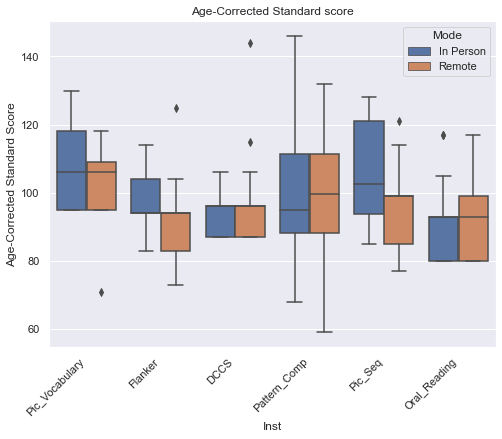

In [129]:
plt.figure(figsize=(8, 6))
chart =sns.boxplot(x = 'Inst', y = 'Age-Corrected Standard Score', hue='Mode',data = boxr)
plt.title('Age-Corrected Standard score')
chart.set_xticklabels(chart.get_xticklabels(), rotation=45, horizontalalignment='right')

[Text(0, 0, 'Pic_Vocabulary'),
 Text(1, 0, 'Flanker'),
 Text(2, 0, 'DCCS'),
 Text(3, 0, 'Pattern_Comp'),
 Text(4, 0, 'Pic_Seq'),
 Text(5, 0, 'Oral_Reading')]

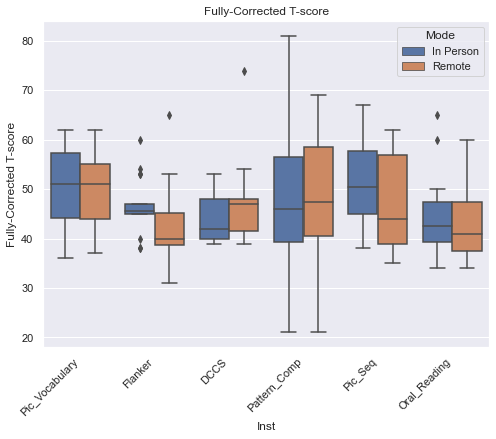

In [130]:
plt.figure(figsize=(8, 6))
chart =sns.boxplot(x = 'Inst', y = 'Fully-Corrected T-score', hue='Mode',data = boxr)
plt.title('Fully-Corrected T-score')
chart.set_xticklabels(chart.get_xticklabels(), rotation=45, horizontalalignment='right')

# multiple ANOVA
https://www.marsja.se/python-manova-made-easy-using-statsmodels/

In [131]:
from statsmodels.multivariate.manova import MANOVA

In [132]:
#Drop this duplicate 
boxr= boxr[boxr['PIN']!='EPSF_01247_A']

In [133]:
boxr.groupby(['Inst','Mode'])['Age-Corrected Standard Score'].mean()

Inst            Mode     
DCCS            In Person    94.50
                Remote       98.00
Flanker         In Person    98.31
                Remote       91.12
Oral_Reading    In Person    92.62
                Remote       90.93
Pattern_Comp    In Person    98.38
                Remote      100.43
Pic_Seq         In Person   105.50
                Remote       97.00
Pic_Vocabulary  In Person   105.62
                Remote      102.69
Name: Age-Corrected Standard Score, dtype: float64

In [134]:
boxr.to_csv('C:/Users/tsb7592/Box/Avera NIHTB Data/Subset/ICC_data.csv', index=False)

In [135]:
ma=boxr.pivot_table(index=['PIN', 'Mode'], columns='Inst', values='Age-Corrected Standard Score', aggfunc='first').reset_index()
mf=boxr.pivot_table(index=['PIN', 'Mode'], columns='Inst', values='Fully-Corrected T-score', aggfunc='first').reset_index()

In [136]:
#ma=ma.drop(columns=['List_Sorting'])

In [137]:
ma =ma.dropna()

In [138]:
ma.columns

Index(['PIN', 'Mode', 'DCCS', 'Flanker', 'Oral_Reading', 'Pattern_Comp',
       'Pic_Seq', 'Pic_Vocabulary'],
      dtype='object', name='Inst')

In [139]:
maov = MANOVA.from_formula('DCCS+ Flanker +Oral_Reading+Pattern_Comp+Pic_Seq+Pic_Vocabulary~ Mode', data=ma)

In [140]:
print('***multiple ANOVA ---Aged***')
print(maov.mv_test())
print('')

***multiple ANOVA ---Aged***
                   Multivariate linear model
                                                               
---------------------------------------------------------------
       Intercept         Value   Num DF  Den DF F Value  Pr > F
---------------------------------------------------------------
          Wilks' lambda   0.0072 6.0000 20.0000 461.6966 0.0000
         Pillai's trace   0.9928 6.0000 20.0000 461.6966 0.0000
 Hotelling-Lawley trace 138.5090 6.0000 20.0000 461.6966 0.0000
    Roy's greatest root 138.5090 6.0000 20.0000 461.6966 0.0000
---------------------------------------------------------------
                                                               
---------------------------------------------------------------
             Mode          Value  Num DF  Den DF F Value Pr > F
---------------------------------------------------------------
             Wilks' lambda 0.4644 6.0000 20.0000  3.8445 0.0103
            Pillai's trace 0.5

In [141]:
mf =mf.dropna()

In [142]:
maov1 = MANOVA.from_formula('DCCS+ Flanker +Oral_Reading+Pattern_Comp+Pic_Seq+Pic_Vocabulary~ Mode', data=mf)

In [143]:
print('***multiple ANOVA ---Fully***')
print(maov1.mv_test())
print('')

***multiple ANOVA ---Fully***
                  Multivariate linear model
                                                              
--------------------------------------------------------------
       Intercept         Value  Num DF  Den DF F Value  Pr > F
--------------------------------------------------------------
          Wilks' lambda  0.0134 6.0000 20.0000 244.6060 0.0000
         Pillai's trace  0.9866 6.0000 20.0000 244.6060 0.0000
 Hotelling-Lawley trace 73.3818 6.0000 20.0000 244.6060 0.0000
    Roy's greatest root 73.3818 6.0000 20.0000 244.6060 0.0000
--------------------------------------------------------------
                                                              
--------------------------------------------------------------
            Mode          Value  Num DF  Den DF F Value Pr > F
--------------------------------------------------------------
            Wilks' lambda 0.4955 6.0000 20.0000  3.3939 0.0179
           Pillai's trace 0.5045 6.0000 20.0

In [144]:
meas =['DCCS','Pic_Vocabulary',
 'Flanker',
 'Pattern_Comp',
 'Pic_Seq',
 'Oral_Reading']

In [145]:
#!pip3 install pingouin

In [146]:
from sklearn.metrics import cohen_kappa_score
import pingouin as pg
#cohen_kappa_score(labeler1, labeler2)

In [147]:
matchcol = ['NIH Toolbox Dimensional Change Card Sort Test Ages 8-11 v2.1',
             'NIH Toolbox Picture Vocabulary Test Age 3+ v2.1',
       'NIH Toolbox Flanker Inhibitory Control and Attention Test Ages 8-11 v2.1',
       'NIH Toolbox Pattern Comparison Processing Speed Test Age 7+ v2.1',
       'NIH Toolbox Picture Sequence Memory Test Age 8+ Form A v2.1',
       'NIH Toolbox Oral Reading Recognition Test Age 3+ v2.1']

In [148]:
aicc = pg.intraclass_corr(data=boxr, targets='Inst', raters='Mode',ratings='Age-Corrected Standard Score', nan_policy='omit')
display(aicc.loc[[3,5]])
print('***Average ICC across all measures - Aged***')
print('ICC Average raters absolute', round(aicc.loc[3]['ICC'],2), aicc.loc[3]['CI95%'])
print('ICC Average fixed raters', round(aicc.loc[5]['ICC'],2), aicc.loc[5]['CI95%'])
print('')

,Type,Description,ICC,F,df1,df2,pval,CI95%
3,ICC1k,Average raters absolute,0.69,3.25,5,6,0.09,"[-0.84, 0.96]"
5,ICC3k,Average fixed raters,0.72,3.56,5,5,0.09,"[-1.01, 0.96]"


***Average ICC across all measures - Aged***
ICC Average raters absolute 0.69 [-0.84  0.96]
ICC Average fixed raters 0.72 [-1.01  0.96]



In [149]:
ficc = pg.intraclass_corr(data=boxr, targets='Inst', raters='Mode',ratings='Fully-Corrected T-score', nan_policy='omit')
display(ficc.loc[[3,5]])
print('***Average ICC across all measures - Fully***')
print('ICC Average raters absolute', round(ficc.loc[3]['ICC'],2), ficc.loc[3]['CI95%'])
print('ICC Average fixed raters', round(ficc.loc[5]['ICC'],2), ficc.loc[5]['CI95%'])
print('')

,Type,Description,ICC,F,df1,df2,pval,CI95%
3,ICC1k,Average raters absolute,0.65,2.83,5,6,0.12,"[-1.11, 0.95]"
5,ICC3k,Average fixed raters,0.62,2.63,5,5,0.16,"[-1.72, 0.95]"


***Average ICC across all measures - Fully***
ICC Average raters absolute 0.65 [-1.11  0.95]
ICC Average fixed raters 0.62 [-1.72  0.95]



# a.	A matched t-test for those who have both in-person and remote 

In [150]:
def matched_ttest(data, match = None):
    if not match:
        match = list(data.Inst.unique())
    for i in range(len(match)):
        subset=boxr.set_index('Inst').filter(like=meas[i], axis=0)
        subset = subset.dropna()
        icc = pg.intraclass_corr(data=subset, targets='PIN', raters='Mode',ratings='Age-Corrected Standard Score', nan_policy='omit')
        icc2 = pg.intraclass_corr(data=subset, targets='PIN', raters='Mode',ratings='Fully-Corrected T-score', nan_policy='omit')
        minst = match[i]
        print('-',minst,'-')
        subset=data.set_index('Inst').filter(like=minst, axis=0)
        subset = subset.dropna()
        a =np.array(subset['Age-Corrected Standard Score'])
        b =np.array(subset['Age-Corrected Standard Score_r'])
        c =np.array(subset['Fully-Corrected T-score'])
        d =np.array(subset['Fully-Corrected T-score_r'])                
        
        print('Age R:', round(b.mean(),2) , '(',round(stdev(b),2),')')
        print('Age:', round(a.mean(),2) , '(',round(stdev(a),2),')')
        print('Aged cohen %6.2f' % cohend(a, b))
        print('Aged: ICC Average raters absolute', round(icc.loc[3]['ICC'],2), icc.loc[3]['CI95%'])
        print('Fully R:', round(d.mean(),2) , '(',round(stdev(d),2),')')
        print('Fully:', round(c.mean(),2) , '(',round(stdev(c),2),')')
        print('Fully cohen %6.2f' % cohend(c, d))
        print('Fully: ICC Average raters absolute', round(icc2.loc[3]['ICC'],2), icc2.loc[3]['CI95%'])
        print('')
        display(subset.head(1))
        display(subset['PIN'].unique())
        print('1. matched t-test:')
        print('Degree of freedom:', len(a)-1)
        print('Age mean score diff',round(b.mean()-a.mean(),2))
        print('Aged: t-statistic = %6.2f, pvalue = %6.3f' %  stats.ttest_ind(a, b, equal_var = False))
        print('Fully mean score diff',round(d.mean()-c.mean(),2))
        print('Fully: t-statistic = %6.2f, pvalue = %6.3f' % stats.ttest_ind(c, d, equal_var = False))
        print('')
        print('2. Correlations between in person and remote:')
        print('Aged: correlation = %6.2f, pvalue = %6.3f' % stats.pearsonr(a, b))
        print('Fully: correlation = %6.2f, pvalue = %6.3f' %stats.pearsonr(c,d))
        print('')  
        print('3. Does it take longer for remote vs. in-person? two-sided test')
        print('Aged: t-statistic = %6.2f pvalue = %6.3f' % stats.wilcoxon(a,b))
        print('Fully: t-statistic = %6.2f pvalue = %6.3f' % stats.wilcoxon(c, d))
        print('')
       # g = sns.jointplot(x="Age-Corrected Standard Score", y="Age-Corrected Standard Score_r", data=subset, kind="reg", truncate=False,color="y", height=7)
        #g.fig.suptitle(minst)
        print('')
        #g = sns.jointplot(x="Fully-Corrected T-score", y="Fully-Corrected T-score_r", data=subset, kind="reg", truncate=False,color="r", height=7)
       # g.fig.suptitle(minst)
        print('')
    return

In [151]:
NIH.to_csv('C:/Users/tsb7592/Box/Avera NIHTB Data/Subset/NIH.csv', index=False)

In [153]:
from statistics import mean, stdev
print('***NIH: A matched t-test for those who have both in-person and remote***\n')
matched_ttest(NIH, matchcol)

***NIH: A matched t-test for those who have both in-person and remote***

- NIH Toolbox Dimensional Change Card Sort Test Ages 8-11 v2.1 -
Age R: 98.0 ( 14.39 )
Age: 94.5 ( 7.07 )
Aged cohen  -0.31
Aged: ICC Average raters absolute 0.45 [-0.54  0.81]
Fully R: 47.0 ( 8.57 )
Fully: 44.62 ( 4.6 )
Fully cohen  -0.35
Fully: ICC Average raters absolute 0.52 [-0.34  0.83]



,PIN,Age-Corrected Standard Score,Fully-Corrected T-score,Age-Corrected Standard Score_r,Fully-Corrected T-score_r
Inst,,,,,
NIH Toolbox Dimensional Change Card Sort Test Ages 8-11 v2.1,EPRC_00032_A,96.00,46.00,96.00,39.00


array(['EPRC_00032_A', 'EPRC_00160_A', 'EPRC_00162_A', 'EPRC_00173_A',
       'EPRC_00179_A', 'EPRC_00181_A', 'EPRC_00183_A', 'EPRC_00191_A',
       'EPRC_00380_A', 'EPRC_00550_A', 'EPSF_00832_A', 'EPSF_00836_A',
       'EPSF_00847_A', 'EPSF_00944_B', 'EPSF_00944_A', 'EPSF_01666_A'],
      dtype=object)

1. matched t-test:
Degree of freedom: 15
Age mean score diff 3.5
Aged: t-statistic =  -0.87, pvalue =  0.392
Fully mean score diff 2.38
Fully: t-statistic =  -0.98, pvalue =  0.339

2. Correlations between in person and remote:
Aged: correlation =   0.37, pvalue =  0.161
Fully: correlation =   0.44, pvalue =  0.090

3. Does it take longer for remote vs. in-person? two-sided test
Aged: t-statistic =  14.50 pvalue =  0.618
Fully: t-statistic =  14.00 pvalue =  0.308



- NIH Toolbox Picture Vocabulary Test Age 3+ v2.1 -
Age R: 102.69 ( 12.52 )
Age: 105.62 ( 10.74 )
Aged cohen   0.25
Aged: ICC Average raters absolute 0.77 [0.36 0.92]
Fully R: 50.31 ( 7.46 )
Fully: 49.56 ( 8.18 )
Fully cohen  -0.10
Fully: ICC Average raters absolute 0.72 [0.22 0.9 ]



C:\Users\tsb7592\Anaconda3\lib\site-packages\scipy\stats\morestats.py:2967: UserWarning: Exact p-value calculation does not work if there are ties. Switching to normal approximation.
  warnings.warn("Exact p-value calculation does not work if there are "
C:\Users\tsb7592\Anaconda3\lib\site-packages\scipy\stats\morestats.py:2981: UserWarning: Sample size too small for normal approximation.
  warnings.warn("Sample size too small for normal approximation.")


,PIN,Age-Corrected Standard Score,Fully-Corrected T-score,Age-Corrected Standard Score_r,Fully-Corrected T-score_r
Inst,,,,,
NIH Toolbox Picture Vocabulary Test Age 3+ v2.1,EPRC_00032_A,95.00,36.00,95.00,44.00


array(['EPRC_00032_A', 'EPRC_00160_A', 'EPRC_00162_A', 'EPRC_00173_A',
       'EPRC_00179_A', 'EPRC_00181_A', 'EPRC_00183_A', 'EPRC_00191_A',
       'EPRC_00380_A', 'EPRC_00550_A', 'EPSF_00832_A', 'EPSF_00836_A',
       'EPSF_00847_A', 'EPSF_00944_B', 'EPSF_00944_A', 'EPSF_01666_A'],
      dtype=object)

1. matched t-test:
Degree of freedom: 15
Age mean score diff -2.94
Aged: t-statistic =   0.71, pvalue =  0.482
Fully mean score diff 0.75
Fully: t-statistic =  -0.27, pvalue =  0.788

2. Correlations between in person and remote:
Aged: correlation =   0.64, pvalue =  0.007
Fully: correlation =   0.55, pvalue =  0.029

3. Does it take longer for remote vs. in-person? two-sided test
Aged: t-statistic =   5.00 pvalue =  0.246
Fully: t-statistic =  20.50 pvalue =  0.812





C:\Users\tsb7592\Anaconda3\lib\site-packages\scipy\stats\morestats.py:2967: UserWarning: Exact p-value calculation does not work if there are ties. Switching to normal approximation.
  warnings.warn("Exact p-value calculation does not work if there are "
C:\Users\tsb7592\Anaconda3\lib\site-packages\scipy\stats\morestats.py:2981: UserWarning: Sample size too small for normal approximation.
  warnings.warn("Sample size too small for normal approximation.")


- NIH Toolbox Flanker Inhibitory Control and Attention Test Ages 8-11 v2.1 -
Age R: 91.12 ( 11.82 )
Age: 98.31 ( 7.41 )
Aged cohen   0.73
Aged: ICC Average raters absolute 0.5 [-0.38  0.83]
Fully R: 42.19 ( 8.17 )
Fully: 46.75 ( 5.88 )
Fully cohen   0.64
Fully: ICC Average raters absolute 0.37 [-0.77  0.78]



,PIN,Age-Corrected Standard Score,Fully-Corrected T-score,Age-Corrected Standard Score_r,Fully-Corrected T-score_r
Inst,,,,,
NIH Toolbox Flanker Inhibitory Control and Attention Test Ages 8-11 v2.1,EPRC_00032_A,94.00,45.00,83.00,38.00


array(['EPRC_00032_A', 'EPRC_00160_A', 'EPRC_00162_A', 'EPRC_00173_A',
       'EPRC_00179_A', 'EPRC_00181_A', 'EPRC_00183_A', 'EPRC_00191_A',
       'EPRC_00380_A', 'EPRC_00550_A', 'EPSF_00832_A', 'EPSF_00836_A',
       'EPSF_00847_A', 'EPSF_00944_B', 'EPSF_00944_A', 'EPSF_01666_A'],
      dtype=object)

1. matched t-test:
Degree of freedom: 15
Age mean score diff -7.19
Aged: t-statistic =   2.06, pvalue =  0.050
Fully mean score diff -4.56
Fully: t-statistic =   1.81, pvalue =  0.081

2. Correlations between in person and remote:
Aged: correlation =   0.55, pvalue =  0.028
Fully: correlation =   0.34, pvalue =  0.197

3. Does it take longer for remote vs. in-person? two-sided test
Aged: t-statistic =  11.00 pvalue =  0.026
Fully: t-statistic =  11.00 pvalue =  0.046





C:\Users\tsb7592\Anaconda3\lib\site-packages\scipy\stats\morestats.py:2967: UserWarning: Exact p-value calculation does not work if there are ties. Switching to normal approximation.
  warnings.warn("Exact p-value calculation does not work if there are "


- NIH Toolbox Pattern Comparison Processing Speed Test Age 7+ v2.1 -
Age R: 100.43 ( 22.05 )
Age: 100.14 ( 21.38 )
Aged cohen  -0.01
Aged: ICC Average raters absolute 0.83 [0.47 0.94]
Fully R: 48.57 ( 13.36 )
Fully: 48.21 ( 15.12 )
Fully cohen  -0.03
Fully: ICC Average raters absolute 0.81 [0.42 0.94]



,PIN,Age-Corrected Standard Score,Fully-Corrected T-score,Age-Corrected Standard Score_r,Fully-Corrected T-score_r
Inst,,,,,
NIH Toolbox Pattern Comparison Processing Speed Test Age 7+ v2.1,EPRC_00032_A,86.00,39.00,86.00,39.00


array(['EPRC_00032_A', 'EPRC_00160_A', 'EPRC_00162_A', 'EPRC_00173_A',
       'EPRC_00179_A', 'EPRC_00181_A', 'EPRC_00191_A', 'EPRC_00380_A',
       'EPSF_00832_A', 'EPSF_00836_A', 'EPSF_00847_A', 'EPSF_00944_B',
       'EPSF_00944_A', 'EPSF_01666_A'], dtype=object)

1. matched t-test:
Degree of freedom: 13
Age mean score diff 0.29
Aged: t-statistic =  -0.03, pvalue =  0.973
Fully mean score diff 0.36
Fully: t-statistic =  -0.07, pvalue =  0.948

2. Correlations between in person and remote:
Aged: correlation =   0.68, pvalue =  0.007
Fully: correlation =   0.66, pvalue =  0.010

3. Does it take longer for remote vs. in-person? two-sided test
Aged: t-statistic =  33.00 pvalue =  1.000
Fully: t-statistic =  37.00 pvalue =  0.874





C:\Users\tsb7592\Anaconda3\lib\site-packages\scipy\stats\morestats.py:2967: UserWarning: Exact p-value calculation does not work if there are ties. Switching to normal approximation.
  warnings.warn("Exact p-value calculation does not work if there are "


- NIH Toolbox Picture Sequence Memory Test Age 8+ Form A v2.1 -
Age R: 95.58 ( 12.57 )
Age: 104.58 ( 16.27 )
Aged cohen   0.62
Aged: ICC Average raters absolute 0.7 [0.07 0.91]
Fully R: 46.08 ( 8.6 )
Fully: 50.67 ( 10.77 )
Fully cohen   0.47
Fully: ICC Average raters absolute 0.81 [0.39 0.94]



,PIN,Age-Corrected Standard Score,Fully-Corrected T-score,Age-Corrected Standard Score_r,Fully-Corrected T-score_r
Inst,,,,,
NIH Toolbox Picture Sequence Memory Test Age 8+ Form A v2.1,EPRC_00032_A,128.00,67.00,121.00,62.00


array(['EPRC_00032_A', 'EPRC_00160_A', 'EPRC_00162_A', 'EPRC_00181_A',
       'EPRC_00183_A', 'EPRC_00191_A', 'EPRC_00380_A', 'EPSF_00832_A',
       'EPSF_00836_A', 'EPSF_00944_B', 'EPSF_00944_A', 'EPSF_01666_A'],
      dtype=object)

C:\Users\tsb7592\Anaconda3\lib\site-packages\scipy\stats\morestats.py:2967: UserWarning: Exact p-value calculation does not work if there are ties. Switching to normal approximation.
  warnings.warn("Exact p-value calculation does not work if there are "


1. matched t-test:
Degree of freedom: 11
Age mean score diff -9.0
Aged: t-statistic =   1.52, pvalue =  0.145
Fully mean score diff -4.58
Fully: t-statistic =   1.15, pvalue =  0.262

2. Correlations between in person and remote:
Aged: correlation =   0.64, pvalue =  0.024
Fully: correlation =   0.74, pvalue =  0.006

3. Does it take longer for remote vs. in-person? two-sided test
Aged: t-statistic =   7.00 pvalue =  0.036
Fully: t-statistic =  10.00 pvalue =  0.037



- NIH Toolbox Oral Reading Recognition Test Age 3+ v2.1 -
Age R: 90.93 ( 12.33 )
Age: 92.6 ( 13.23 )
Aged cohen   0.13
Aged: ICC Average raters absolute 0.9 [0.7  0.97]
Fully R: 43.2 ( 7.96 )
Fully: 44.6 ( 8.83 )
Fully cohen   0.17
Fully: ICC Average raters absolute 0.94 [0.84 0.98]



,PIN,Age-Corrected Standard Score,Fully-Corrected T-score,Age-Corrected Standard Score_r,Fully-Corrected T-score_r
Inst,,,,,
NIH Toolbox Oral Reading Recognition Test Age 3+ v2.1,EPRC_00032_A,80.00,34.00,80.00,34.00


array(['EPRC_00032_A', 'EPRC_00160_A', 'EPRC_00162_A', 'EPRC_00173_A',
       'EPRC_00179_A', 'EPRC_00181_A', 'EPRC_00183_A', 'EPRC_00191_A',
       'EPRC_00380_A', 'EPRC_00550_A', 'EPSF_00832_A', 'EPSF_00836_A',
       'EPSF_00847_A', 'EPSF_00944_B', 'EPSF_00944_A'], dtype=object)

1. matched t-test:
Degree of freedom: 14
Age mean score diff -1.67
Aged: t-statistic =   0.36, pvalue =  0.724
Fully mean score diff -1.4
Fully: t-statistic =   0.46, pvalue =  0.652

2. Correlations between in person and remote:
Aged: correlation =   0.81, pvalue =  0.000
Fully: correlation =   0.91, pvalue =  0.000

3. Does it take longer for remote vs. in-person? two-sided test
Aged: t-statistic =   1.50 pvalue =  0.414
Fully: t-statistic =   1.00 pvalue =  0.141





C:\Users\tsb7592\Anaconda3\lib\site-packages\scipy\stats\morestats.py:2967: UserWarning: Exact p-value calculation does not work if there are ties. Switching to normal approximation.
  warnings.warn("Exact p-value calculation does not work if there are "
C:\Users\tsb7592\Anaconda3\lib\site-packages\scipy\stats\morestats.py:2981: UserWarning: Sample size too small for normal approximation.
  warnings.warn("Sample size too small for normal approximation.")


# 5.	A student’s t-test for everyone 

In [154]:
def remove_nan(li):
    array1 = np.array(li)

    nan_array = np.isnan(array1)
    not_nan_array = ~ nan_array
    array2 = array1[not_nan_array]

    return array2

In [155]:
def unmatched_ttest(ip, rm, match=None):
    if not match:
        match = list(ip.Inst.unique())
    
    for minst in match:
        
        a =np.array(ip.set_index('Inst').filter(like=minst, axis=0)['Age-Corrected Standard Score'])
        b =np.array(rm.set_index('Inst').filter(like=minst, axis=0)['Age-Corrected Standard Score_r'])
        c =np.array(ip.set_index('Inst').filter(like=minst, axis=0)['Fully-Corrected T-score'])
        d =np.array(rm.set_index('Inst').filter(like=minst, axis=0)['Fully-Corrected T-score_r'])
        
        a=remove_nan(a)
        b=remove_nan(b)
        c= remove_nan(c)
        d= remove_nan(d)
        if(len(a)*len(b)*len(c)*len(d))==0:
            continue
        print('-',minst,'-')
            
        print('Age R:', round(b.mean(),2) , '(',round(stdev(b),2),')' , 'N=',len(b))
        print('Age:', round(a.mean(),2) , '(',round(stdev(a),2),')',  'N=',len(a))
        print('Fully R:', round(d.mean(),2) , '(',round(stdev(d),2),')',  'N=',len(d))
        print('Fully:', round(c.mean(),2) , '(',round(stdev(c),2),')',  'N=',len(c))
        print('')
        print('Aged cohen %6.2f' % cohend(a, b), 'Fully cohen %6.2f' % cohend(c, d))    
        print('') 
        print('Aged: t-statistic = %6.2f, pvalue = %6.3f' % stats.ttest_ind(a,b, equal_var=False))
        print('Fully: t-statistic = %6.2f, pvalue = %6.3f' % stats.ttest_ind(c,d, equal_var=False))
        print('')
    return 

In [156]:
print('***NIH: unmatched t-test for everyone***\n')
unmatched_ttest(raw, raw_r, matchcol)

***NIH: unmatched t-test for everyone***

- NIH Toolbox Dimensional Change Card Sort Test Ages 8-11 v2.1 -
Age R: 98.0 ( 14.39 ) N= 16
Age: 94.17 ( 6.89 ) N= 18
Fully R: 47.0 ( 8.57 ) N= 16
Fully: 44.0 ( 4.69 ) N= 18

Aged cohen  -0.35 Fully cohen  -0.44

Aged: t-statistic =  -0.97, pvalue =  0.342
Fully: t-statistic =  -1.24, pvalue =  0.226

- NIH Toolbox Picture Vocabulary Test Age 3+ v2.1 -
Age R: 102.69 ( 12.52 ) N= 16
Age: 107.0 ( 10.86 ) N= 18
Fully R: 50.31 ( 7.46 ) N= 16
Fully: 50.44 ( 8.25 ) N= 18

Aged cohen   0.37 Fully cohen   0.02

Aged: t-statistic =   1.07, pvalue =  0.295
Fully: t-statistic =   0.05, pvalue =  0.961

- NIH Toolbox Flanker Inhibitory Control and Attention Test Ages 8-11 v2.1 -
Age R: 91.12 ( 11.82 ) N= 16
Age: 97.83 ( 7.1 ) N= 18
Fully R: 42.19 ( 8.17 ) N= 16
Fully: 46.56 ( 5.55 ) N= 18

Aged cohen   0.70 Fully cohen   0.63

Aged: t-statistic =   1.98, pvalue =  0.060
Fully: t-statistic =   1.80, pvalue =  0.084

- NIH Toolbox Pattern Comparison Process

# Composite Scores

#1.	A matched t-test for those who have both in-person and remote
#2.	Correlations between remote and in-person
#3.	Does it take longer for remote vs. in-person
#4.	Plot on x-axis remote scores for all the Inst, and plot on y-axis all the in-person 

In [157]:
import seaborn as sns
sns.set_theme(style="darkgrid")

In [158]:
scores.to_csv('C:/Users/tsb7592/Box/Avera NIHTB Data/Subset/CompositeScores.csv', index=False)

In [159]:
print('***Composite: A matched t-test for those who have both in-person and remote***\n')
matched_ttest(scores)

***Composite: A matched t-test for those who have both in-person and remote***

- Cognition Crystallized Composite v1.1 -
Age R: 96.33 ( 12.79 )
Age: 99.07 ( 12.13 )
Aged cohen   0.22
Aged: ICC Average raters absolute 0.45 [-0.54  0.81]
Fully R: 46.53 ( 8.26 )
Fully: 47.0 ( 8.8 )
Fully cohen   0.05
Fully: ICC Average raters absolute 0.52 [-0.34  0.83]



,PIN,Uncorrected Standard Score,Age-Corrected Standard Score,National Percentile (age adjusted),Fully-Corrected T-score,Uncorrected Standard Score_r,Age-Corrected Standard Score_r,National Percentile (age adjusted)_r,Fully-Corrected T-score_r
Inst,,,,,,,,,
Cognition Crystallized Composite v1.1,EPRC_00032_A,71.00,85.00,16.00,32.00,74.00,85.00,16.00,38.00


array(['EPRC_00032_A', 'EPRC_00160_A', 'EPRC_00162_A', 'EPRC_00173_A',
       'EPRC_00179_A', 'EPRC_00181_A', 'EPRC_00183_A', 'EPRC_00191_A',
       'EPRC_00380_A', 'EPRC_00550_A', 'EPSF_00832_A', 'EPSF_00836_A',
       'EPSF_00847_A', 'EPSF_00944_B', 'EPSF_00944_A'], dtype=object)

1. matched t-test:
Degree of freedom: 14
Age mean score diff -2.73
Aged: t-statistic =   0.60, pvalue =  0.553
Fully mean score diff -0.47
Fully: t-statistic =   0.15, pvalue =  0.882

2. Correlations between in person and remote:
Aged: correlation =   0.79, pvalue =  0.001
Fully: correlation =   0.82, pvalue =  0.000

3. Does it take longer for remote vs. in-person? two-sided test
Aged: t-statistic =   9.00 pvalue =  0.196
Fully: t-statistic =  23.50 pvalue =  0.681



- Cognition Early Childhood Composite v1.1 -
Age R: 96.77 ( 12.64 )
Age: 100.54 ( 10.44 )
Aged cohen   0.33
Aged: ICC Average raters absolute 0.77 [0.36 0.92]
Fully R: 44.46 ( 8.19 )
Fully: 46.08 ( 5.91 )
Fully cohen   0.23
Fully: ICC Average raters absolute 0.72 [0.22 0.9 ]



C:\Users\tsb7592\Anaconda3\lib\site-packages\scipy\stats\morestats.py:2967: UserWarning: Exact p-value calculation does not work if there are ties. Switching to normal approximation.
  warnings.warn("Exact p-value calculation does not work if there are "
C:\Users\tsb7592\Anaconda3\lib\site-packages\scipy\stats\morestats.py:2981: UserWarning: Sample size too small for normal approximation.
  warnings.warn("Sample size too small for normal approximation.")


,PIN,Uncorrected Standard Score,Age-Corrected Standard Score,National Percentile (age adjusted),Fully-Corrected T-score,Uncorrected Standard Score_r,Age-Corrected Standard Score_r,National Percentile (age adjusted)_r,Fully-Corrected T-score_r
Inst,,,,,,,,,
Cognition Early Childhood Composite v1.1,EPRC_00032_A,89.00,105.00,62.00,48.00,85.00,98.00,44.00,43.00


array(['EPRC_00032_A', 'EPRC_00160_A', 'EPRC_00162_A', 'EPRC_00181_A',
       'EPRC_00183_A', 'EPRC_00191_A', 'EPRC_00380_A', 'EPSF_00832_A',
       'EPSF_00836_A', 'EPSF_00847_A', 'EPSF_00944_B', 'EPSF_00944_A',
       'EPSF_01666_A'], dtype=object)

1. matched t-test:
Degree of freedom: 12
Age mean score diff -3.77
Aged: t-statistic =   0.83, pvalue =  0.415
Fully mean score diff -1.62
Fully: t-statistic =   0.58, pvalue =  0.570

2. Correlations between in person and remote:
Aged: correlation =   0.43, pvalue =  0.142
Fully: correlation =   0.47, pvalue =  0.101

3. Does it take longer for remote vs. in-person? two-sided test
Aged: t-statistic =  15.00 pvalue =  0.060
Fully: t-statistic =  22.00 pvalue =  0.110





C:\Users\tsb7592\Anaconda3\lib\site-packages\scipy\stats\morestats.py:2967: UserWarning: Exact p-value calculation does not work if there are ties. Switching to normal approximation.
  warnings.warn("Exact p-value calculation does not work if there are "


In [160]:
boxp.tail()

,PIN,Inst,Uncorrected Standard Score,Age-Corrected Standard Score,National Percentile (age adjusted),Fully-Corrected T-score,Mode
6,EPSF_00944_A,Cognition Crystallized Composite v1.1,76.00,92.00,30.00,47.00,Remote
7,EPSF_00944_A,Cognition Early Childhood Composite v1.1,77.00,89.00,24.00,39.00,Remote
6,EPSF_00944_B,Cognition Crystallized Composite v1.1,71.00,85.00,16.00,42.00,Remote
7,EPSF_00944_B,Cognition Early Childhood Composite v1.1,81.00,94.00,35.00,44.00,Remote
7,EPSF_01666_A,Cognition Early Childhood Composite v1.1,79.00,92.00,29.00,41.00,Remote


In [161]:
boxp["Inst"].replace({"Cognition Fluid Composite v1.1":'CFC','Cognition Crystallized Composite v1.1':'CCC', 'Cognition Total Composite Score v1.1':'CTC','Cognition Early Childhood Composite v1.1':'CECC'}, inplace=True)

Text(0.5, 1.0, 'Age-Corrected Standard score')

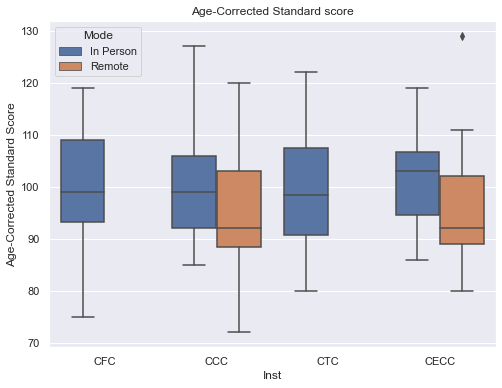

In [162]:
plt.figure(figsize=(8, 6))
sns.boxplot(x = 'Inst', y = 'Age-Corrected Standard Score', hue='Mode',data = boxp)
plt.title('Age-Corrected Standard score')

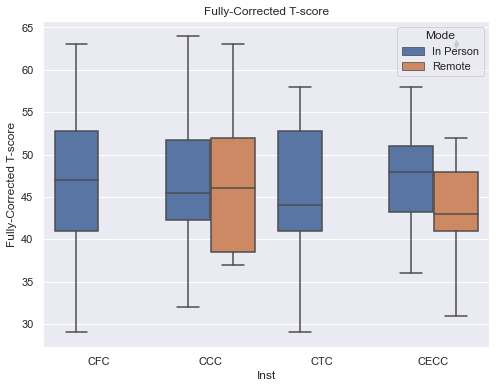

In [163]:
# Box plot of Fully In person vs. Remote
plt.figure(figsize=(8, 6))
sns.boxplot(x = 'Inst', y = 'Fully-Corrected T-score', hue='Mode',data = boxp)
plt.title('Fully-Corrected T-score')
plt.show()

In [164]:
scores[scores['PIN']=='EPRC_00380_A']

,PIN,Inst,Uncorrected Standard Score,Age-Corrected Standard Score,National Percentile (age adjusted),Fully-Corrected T-score,Uncorrected Standard Score_r,Age-Corrected Standard Score_r,National Percentile (age adjusted)_r,Fully-Corrected T-score_r
14,EPRC_00380_A,Cognition Crystallized Composite v1.1,74.00,92.00,30.00,38.00,74.00,92.00,30.00,38.00
15,EPRC_00380_A,Cognition Early Childhood Composite v1.1,77.00,89.00,22.00,37.00,66.00,80.00,10.00,31.00


# 5.	A student’s t-test for everyone 

In [165]:
print('***Composite: unmatched t-test for everyone***\n')
unmatched_ttest(comp, comp_r)

***Composite: unmatched t-test for everyone***

- Cognition Crystallized Composite v1.1 -
Age R: 96.33 ( 12.79 ) N= 15
Age: 99.44 ( 11.38 ) N= 18
Fully R: 46.53 ( 8.26 ) N= 15
Fully: 46.72 ( 8.34 ) N= 18

Aged cohen   0.26 Fully cohen   0.02

Aged: t-statistic =   0.73, pvalue =  0.471
Fully: t-statistic =   0.07, pvalue =  0.949

- Cognition Early Childhood Composite v1.1 -
Age R: 96.77 ( 12.64 ) N= 13
Age: 101.61 ( 9.95 ) N= 18
Fully R: 44.46 ( 8.19 ) N= 13
Fully: 47.0 ( 5.91 ) N= 18

Aged cohen   0.43 Fully cohen   0.37

Aged: t-statistic =   1.15, pvalue =  0.263
Fully: t-statistic =   0.95, pvalue =  0.352



In [166]:
sys.stdout.close()
sys.stdout=stdoutOrigin

NameError: name 'sys' is not defined

# Wide to Long

In [167]:
all = pd.concat([df,dfr]) 

In [168]:
all.Inst.unique()

array(['NIH Toolbox Picture Vocabulary Test Age 3+ v2.1',
       'NIH Toolbox Flanker Inhibitory Control and Attention Test Ages 8-11 v2.1',
       'NIH Toolbox List Sorting Working Memory Test Age 7+ v2.1',
       'NIH Toolbox Dimensional Change Card Sort Test Ages 8-11 v2.1',
       'NIH Toolbox Pattern Comparison Processing Speed Test Age 7+ v2.1',
       'NIH Toolbox Picture Sequence Memory Test Age 8+ Form A v2.1',
       'NIH Toolbox Oral Reading Recognition Test Age 3+ v2.1',
       'Cognition Fluid Composite v1.1',
       'Cognition Crystallized Composite v1.1',
       'Cognition Total Composite Score v1.1',
       'Cognition Early Childhood Composite v1.1',
       'NIH Toolbox Oral Reading Recognition Test Age 3+ Instructions v2.1',
       'NIH Toolbox Picture Sequence Memory Test Age 8+ Form B v2.1'],
      dtype=object)

In [169]:
def combine(df, dfr, select):
    a=df[df.Inst==select][['PIN','RawScore']]
    b=dfr[dfr.Inst==select][['PIN','RawScore']]
    ab = pd.merge(a, b, on=["PIN"])
    
    return ab.iloc[:,1:]

In [170]:
combine(df, dfr, 'NIH Toolbox Dimensional Change Card Sort Test Ages 8-11 v2.1')

,RawScore_x,RawScore_y
0,26.00,29.00
1,30.00,30.00
2,27.00,29.00
3,28.00,30.00
4,25.00,26.00
5,30.00,29.00
6,29.00,25.00
7,30.00,28.00
8,29.00,26.00
9,29.00,30.00


In [171]:
combine(df, dfr, 'NIH Toolbox Flanker Inhibitory Control and Attention Test Ages 8-11 v2.1')

,RawScore_x,RawScore_y
0,20.00,20.00
1,20.00,20.00
2,20.00,20.00
3,20.00,20.00
4,20.00,19.00
5,19.00,19.00
6,20.00,20.00
7,20.00,20.00
8,19.00,17.00
9,20.00,20.00


In [172]:
time_breakdown[time_breakdown['PIN']=='EPSF_01247_A']

,PIN,Inst,Date,Time,Mode
137,EPSF_01247_A,NIH Toolbox Dimensional Change Card Sort Test ...,2021-04-12,5.28,In Person
138,EPSF_01247_A,NIH Toolbox Flanker Inhibitory Control and Att...,2021-04-12,3.53,In Person
139,EPSF_01247_A,NIH Toolbox List Sorting Working Memory Test A...,2021-04-12,6.73,In Person
140,EPSF_01247_A,NIH Toolbox Oral Reading Recognition Test Age ...,2021-04-12,1.63,In Person
141,EPSF_01247_A,NIH Toolbox Pattern Comparison Processing Spee...,2021-04-12,1.73,In Person
142,EPSF_01247_A,NIH Toolbox Pattern Comparison Processing Spee...,2021-04-12,1.72,In Person
143,EPSF_01247_A,NIH Toolbox Picture Sequence Memory Test Age 8...,2021-04-12,7.22,In Person
144,EPSF_01247_A,NIH Toolbox Picture Vocabulary Test Age 3+ Pra...,2021-04-12,1.38,In Person
145,EPSF_01247_A,NIH Toolbox Picture Vocabulary Test Age 3+ v2.1,2021-04-12,1.80,In Person


In [173]:
rv =pd.merge(time_breakdown, all, how='outer',on=['PIN','Inst','Mode'])

In [174]:
rv.shape

(389, 16)

In [175]:
rv['Site'] = np.where(rv['PIN'].str.contains('SF'), 'Sioux Falls', 'Rapid City')

In [176]:
rv.loc[(rv['PIN']=='EPRC_00173_A') & (rv['Mode']=='In Person'),'Date'] ='2021-03-31'
rv.loc[(rv['PIN']=='EPRC_00173_A') & (rv['Mode']=='Remote'),'Date'] ='2021-04-08'

In [177]:
rv['PIN'].nunique()

18

In [178]:
summary=rv.groupby(['PIN','Mode'])['Date'].last().reset_index()
summary

,PIN,Mode,Date
0,EPRC_00032_A,In Person,2021-03-30
1,EPRC_00032_A,Remote,2021-04-06
2,EPRC_00160_A,In Person,2021-04-23
3,EPRC_00160_A,Remote,2021-04-16
4,EPRC_00162_A,In Person,2021-04-07
5,EPRC_00162_A,Remote,2021-04-14
6,EPRC_00173_A,In Person,2021-03-31
7,EPRC_00173_A,Remote,2021-04-08
8,EPRC_00179_A,In Person,2021-04-27
9,EPRC_00179_A,Remote,2021-04-20


In [179]:
#with pd.ExcelWriter('C:/Users/tsb7592/Box/Avera NIHTB Data/summary1.xlsx') as writer:  
 #   summary.to_excel(writer,sheet_name='all',index= False)

In [180]:
rv.to_csv('C:/Users/tsb7592/Box/Avera NIHTB Data/wide_format_data.csv', index=False)

In [181]:
long = rv.melt(id_vars=['PIN','Inst','Mode','Date','Time','Site'], 
        var_name="Scores", 
        value_name="Value")

In [182]:
long=long.dropna(thresh=6, axis=0)

In [183]:
long=long.drop_duplicates()

In [184]:
long.shape

(3526, 8)

In [185]:
long.to_csv('C:/Users/tsb7592/Box/Avera NIHTB Data/long_format_data.csv', index=False)